In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance


#mirar estadisticas
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# ------------------------------------
# Crear dataframe con los datos de facturación de clientes

#data = {'Id': [1, 2, 3, 4, 5],
#        'Fecha': [datetime.datetime(2024, 6, 5),datetime.datetime(2024, 6, 4),datetime.datetime(2024, 5, 31),datetime.datetime(2024, 5, 30),datetime.datetime(2024, 5, 29) ],
#        'Dias' : [364, 363, 359, 358, 357],
#        'Ultimo': [95,90,90,96,90],
#        'Apertura': [90,93,90,99,99],
#        'Maximo': [95,93,90,99,99],
#        'Minimo': [90,90,90,96,90],
#        'Vol': [2370000,951210,370780,663190,1430000],
#        'Var': [0.06,0.00,-0.06,0.07,-0.10]

#}

#data_etb = pd.DataFrame(data)

#importamos la data

data_etb = pd.read_excel('data-python-etb_test.xlsx')
data_etb_test = pd.read_excel('data-python-etb_tes_predic.xlsx')
# Si no se cuenta con ella, se simula tener una
print(data_etb.columns)





Index(['Fecha', 'Diferencia_Dias', 'Dias', 'Ultimo', 'Apertura', 'Maximo',
       'Minimo', 'Vol', 'Var'],
      dtype='object')


In [5]:
print(data_etb)

        Fecha  Diferencia_Dias  Dias  Ultimo  Apertura  Maximo  Minimo  \
0  2024-04-11                1   309   100.0     100.0   100.0   100.0   
1  2024-04-10               44   308   100.0     100.0   100.0   100.0   
2  2024-02-26               26   264    95.0      90.5    95.0    90.5   
3  2024-01-31               14   238   106.0     106.0   106.0   106.0   
4  2024-01-17                1   224   108.0     109.0   109.0   108.0   
5  2024-01-16                5   223   106.0      90.0   106.0    90.0   
6  2024-01-11                6   218    88.0      88.0    88.0    88.0   
7  2024-01-05                8   212    91.0      91.0    91.0    91.0   
8  2023-12-28                7   204    95.0      95.0    95.0    95.0   
9  2023-12-21                1   197    88.0      88.0    88.0    88.0   
10 2023-12-20               54   196    87.0      78.0    87.0    78.0   
11 2023-10-27               17   142    78.7      78.7    78.7    78.7   
12 2023-10-10                1   125  

In [6]:
print(data_etb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            30 non-null     datetime64[ns]
 1   Diferencia_Dias  30 non-null     int64         
 2   Dias             30 non-null     int64         
 3   Ultimo           30 non-null     float64       
 4   Apertura         30 non-null     float64       
 5   Maximo           30 non-null     float64       
 6   Minimo           30 non-null     float64       
 7   Vol              30 non-null     object        
 8   Var              30 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 2.2+ KB
None


In [7]:
#dimension del dataframe
print(data_etb.shape)
#37 filas, 9 columnas

(30, 9)


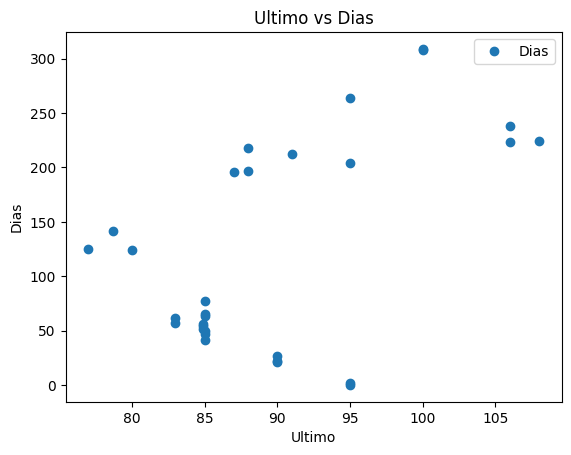

In [8]:
data_etb.plot(x='Ultimo', y='Dias', style='o')
data_etb.plot
plt.title('Ultimo vs Dias')
plt.xlabel('Ultimo')
plt.ylabel('Dias')
plt.show()

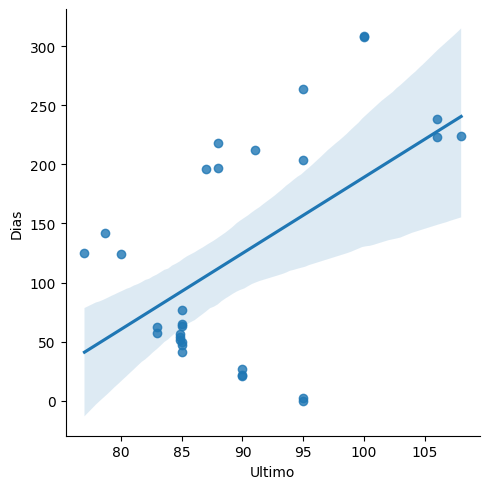

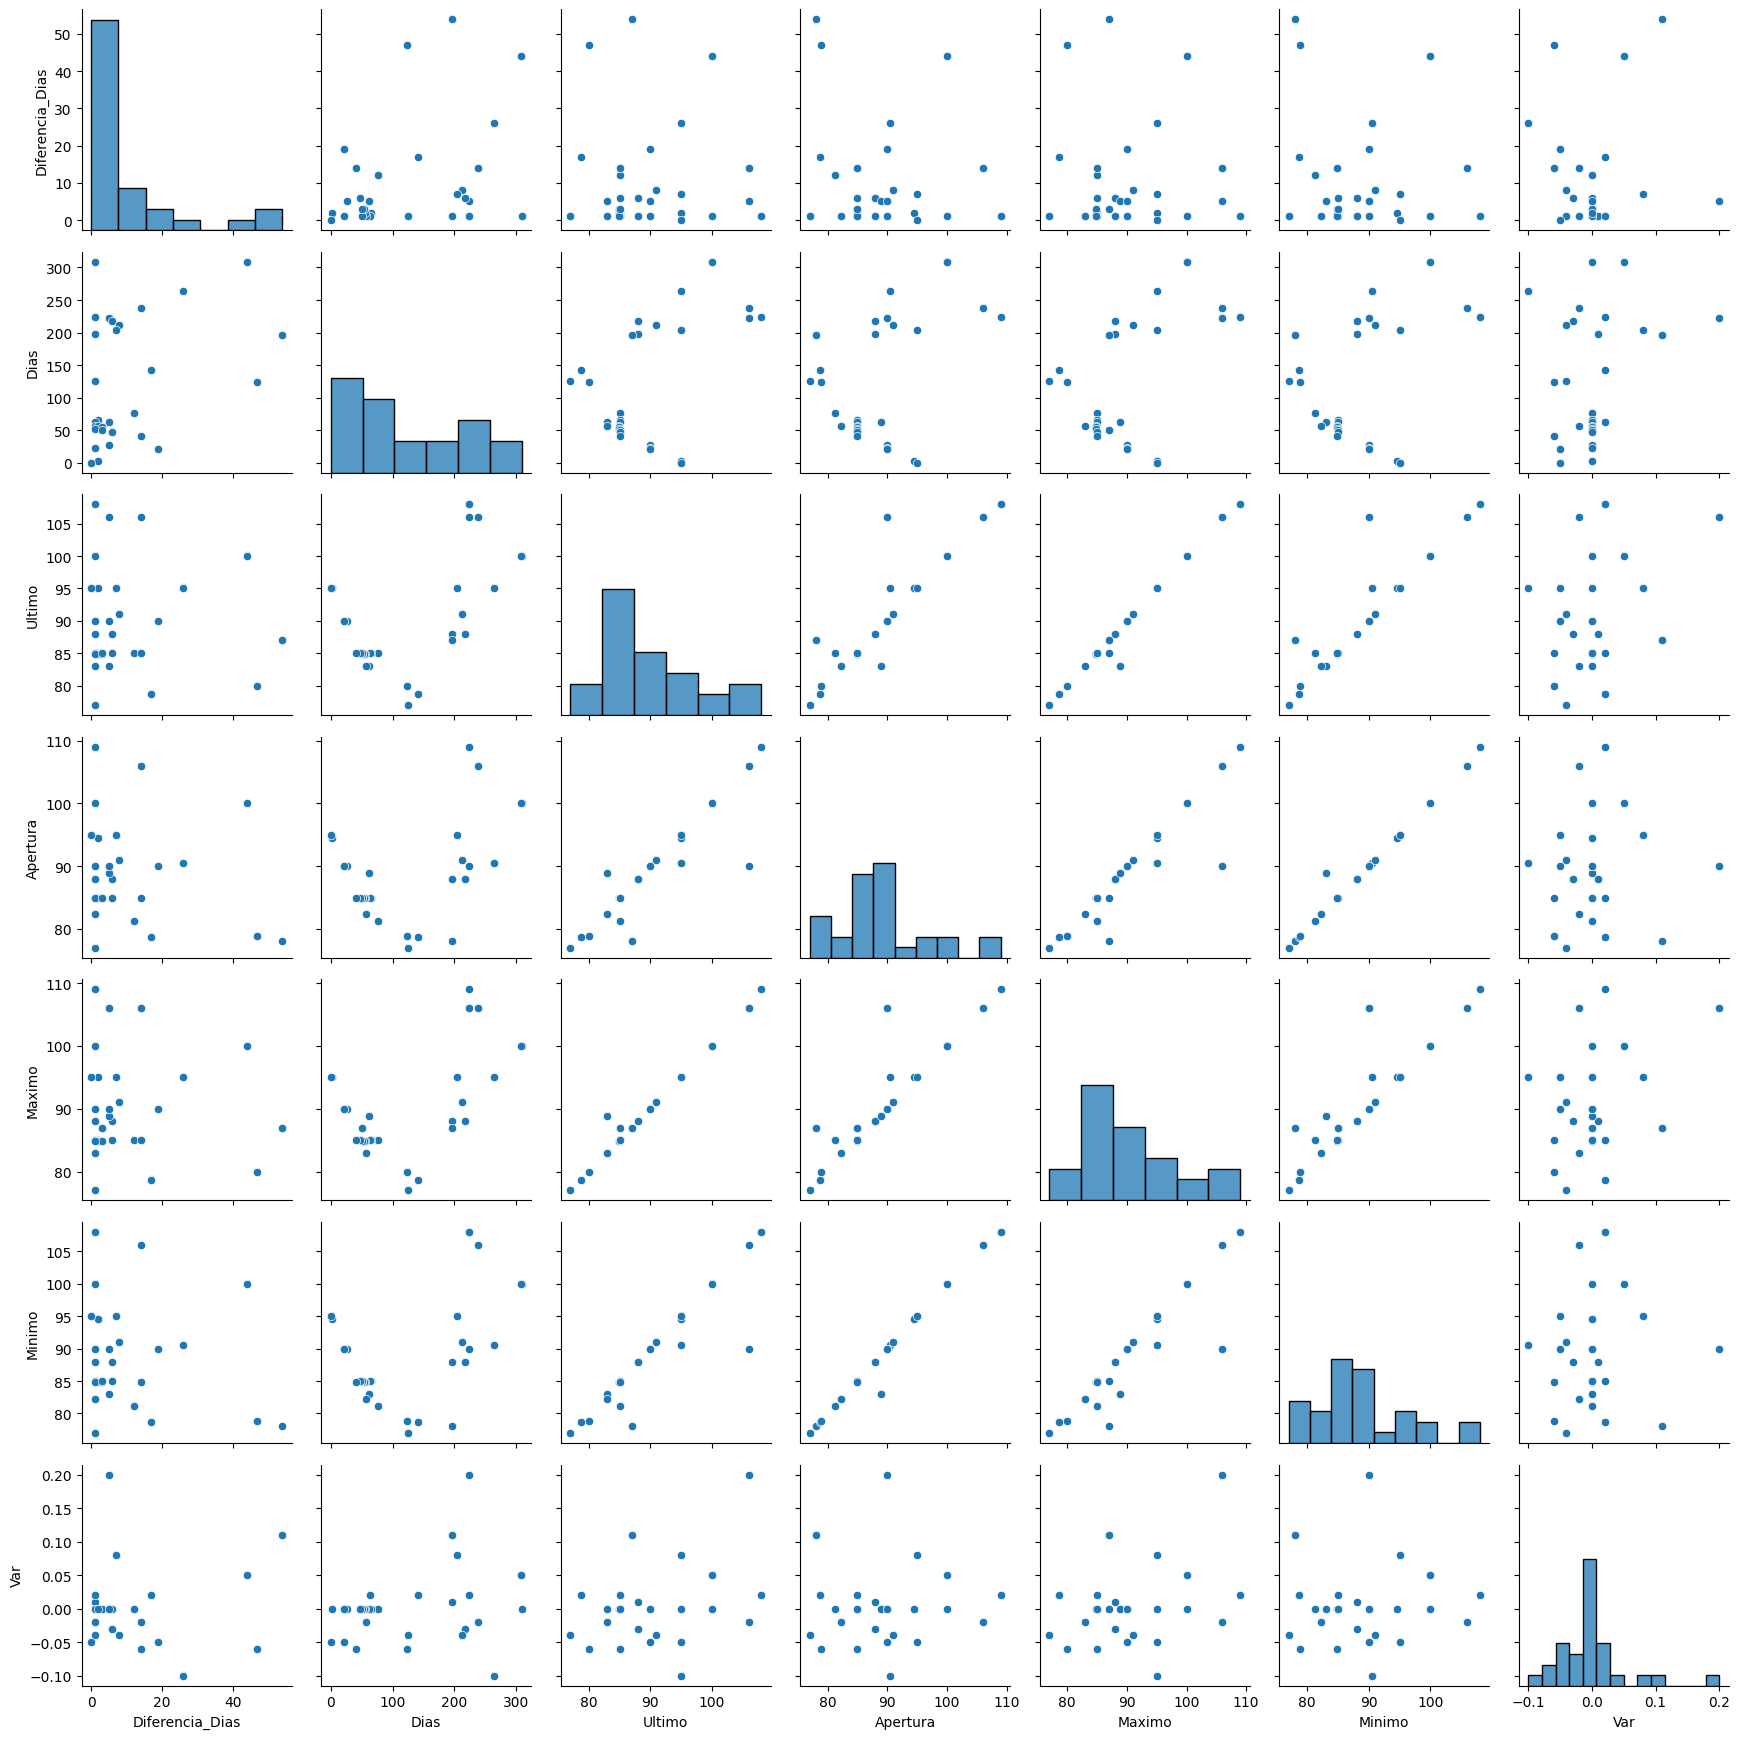

In [33]:

seabornInstance.lmplot(x='Ultimo', y='Dias', data=data_etb)
seabornInstance.pairplot(data_etb, height=2.5)
plt.tight_layout()
plt.show()

<Axes: >

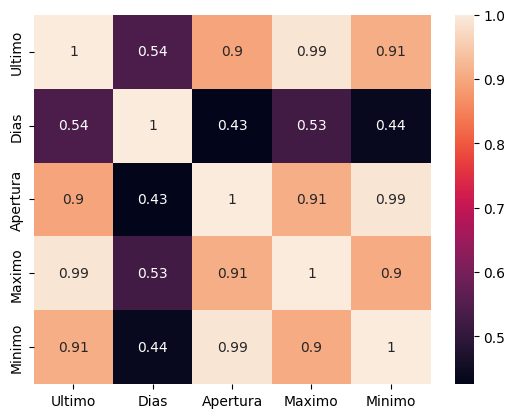

In [41]:
cols = ["Ultimo","Dias","Apertura","Maximo","Minimo"]
seabornInstance.heatmap(
    data=data_etb[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [10]:
x = data_etb['Ultimo'].values
y = data_etb['Dias'].values

#calculo de coeficiente de correlacion

coeficiente = np.corrcoef(data_etb['Ultimo'], data_etb['Dias'])[0, 1]
print ("el coeficiente de correlacion es de : " ,coeficiente)

#Calculos Iniciales
data_etb['xy'] = data_etb['Dias']*data_etb['Ultimo']
data_etb['x2'] = data_etb['Dias']**2
#print (data_etb)

#sumatorias
sumx=data_etb['Dias'].sum()
sumy=data_etb['Ultimo'].sum()
sumxy=data_etb['xy'].sum()
sumx2=data_etb['x2'].sum()
print("Sumatorias Columnas")
print("Dias:",sumx,"\nUltimo:",sumy,"\nxy:",sumxy,"\nx2:",sumx2)


# Calcular las medias
media_x = np.mean(x)
media_y = np.mean(y)

# Calculo la pendiente
numerador = sum((x - media_x) * (y - media_y))
denominador = sum((x - media_x) ** 2)
pendiente = numerador / denominador
print ("la pendiente es :",pendiente)
# Calcular la intersección (b)
inteseccion = media_y - pendiente * media_x
print(f"Intersección (b): {inteseccion}")


# añadimos la variable a predecir al modelo
x = sm.add_constant(x)
# generamos y entrenamos el modelo
linear_model = sm.OLS(y, x)
results = linear_model.fit()
results.summary()







el coeficiente de correlacion es de :  0.5404258453878544
Sumatorias Columnas
Dias: 3679 
Ultimo: 2690.3999999999996 
xy: 341993.3 
x2: 716981
la pendiente es : 6.436950803993066
Intersección (b): -454.63241476876476


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     11.55
Date:                Mon, 10 Jun 2024   Prob (F-statistic):            0.00205
Time:                        20:47:04   Log-Likelihood:                -173.73
No. Observations:                  30   AIC:                             351.5
Df Residuals:                      28   BIC:                             354.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -454.6324    170.506     -2.666      0.013    -803.897    -105.368
x1             6.4370      1.894      3.399      0.002       2.557      10.316
==============================================================================
Omnibus:                        1.632   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.073
Skew:                          -0.124   Prob(JB):                        0.585
Kurtosis:                       2.107   Cond. No.                     1.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

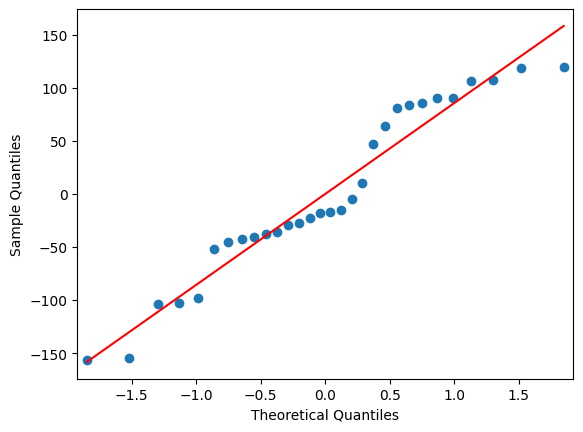

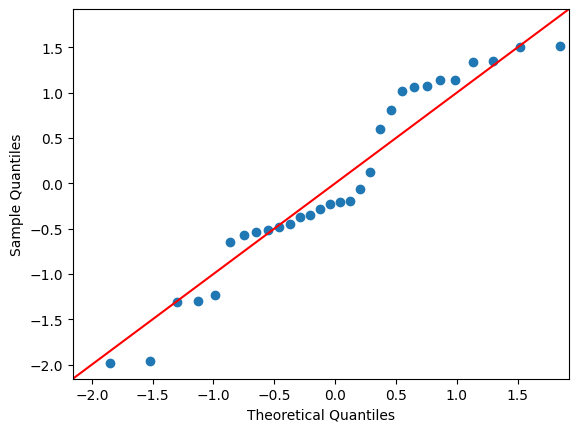

In [43]:


residuals = linear_model.fit().resid
fig = sm.qqplot(residuals, line='r')
fig = sm.qqplot(residuals, stats.t, fit=True, line='45')

# plt.show()

In [44]:
#Procedemos a realizar la predicción con nuestro set para medir el acierto del algoritmo.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=100)

linear_regression_model = LinearRegression()
# generamos el modelo con el set de entrenamiento
linear_regression_model.fit(X_train, y_train)

r_square = linear_regression_model.score(X_train, y_train)
intercept = linear_regression_model.intercept_
slope = linear_regression_model.coef_
print(f'El coeficiente de determinación es de: {r_square}')
print(f'Intercepto: {intercept}')
print(f'Pendiente: {slope}')


y_predicted = linear_regression_model.predict(X_test)
seabornInstance.distplot(y_predicted)




ValueError: Expected 2D array, got 1D array instead:
array=[100.   83.   85.   84.9  84.9  95.   84.9  87.   85.   85.   85.   91.
 106.   85.   95. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.